In [41]:
# 1-1. stream_response 테스트

from langchain_openai import ChatOpenAI
from langchain_teddynote.messages import stream_response
from dotenv import load_dotenv
import time

load_dotenv()

# 객체 생성
llm = ChatOpenAI(
    temperature=0.7,  # 창의성 (0.0 ~ 2.0)
    model_name="gpt-4o-mini",  # 모델명
)

# 질의 내용
summarize_prompt = f"""
다음은 한 매장의 최근 운영 데이터를 요약한 내용입니다.
아래 [데이터]를 기반으로 매장의 현재 상황을 분석하고, 문제가 있다면 그 원인을 추론해 주세요.
또한 아래 [요청사항]을 기반으로 매장의 개선을 위한 구체적인 전략도 제안해 주세요.

[데이터]

일평균 방문 고객 수: 320명 → 최근 일주일간 270명으로 감소

평균 고객 체류 시간: 25분

점심 시간(12시~2시) 매출: 일 평균 대비 35% 감소

최근 한 달간 리뷰 평점: 4.5점 → 3.8점

직원 2명 퇴사 → 대체 인력 미배치


[요청사항]

위 데이터를 기반으로 매장의 현재 상황을 진단해 주세요.

어떤 문제가 발생하고 있는지, 그 원인이 무엇인지 추론해 주세요.

이를 개선하기 위한 실행 전략을 제안해 주세요.
"""

start_time = time.time()

# response = llm.invoke(prompt)
response = llm.stream(summarize_prompt)
stream_response(response)

end_time = time.time()

## 현재 상황 진단

위의 데이터를 종합적으로 분석해보면, 매장은 여러 가지 문제에 직면해 있습니다.

1. **고객 수 감소**: 일평균 방문 고객 수가 320명에서 270명으로 감소했습니다. 이는 매장에 대한 고객의 관심이나 방문 의욕이 줄어들었다는 신호입니다.

2. **매출 감소**: 특히 점심 시간(12시~2시) 매출이 일 평균 대비 35% 감소했습니다. 이는 주 고객층인 직장인이나 학생들이 점심 시간에 매장을 찾지 않거나 다른 매장으로 이동했음을 나타냅니다.

3. **리뷰 평점 하락**: 최근 한 달간의 리뷰 평점이 4.5점에서 3.8점으로 급격히 하락했습니다. 이는 고객의 서비스나 제품에 대한 만족도가 크게 떨어졌음을 보여줍니다.

4. **인력 부족**: 직원 2명이 퇴사했지만 대체 인력이 배치되지 않았습니다. 인력 부족은 고객 서비스의 질을 저하시킬 수 있으며, 이는 고객의 불만을 초래할 수 있습니다.

## 문제 및 원인 추론

1. **고객 수 감소의 원인**:
   - 경쟁 매장의 증가 또는 새로운 메뉴/서비스의 부재.
   - 고객의 변화하는 기호에 대응하지 못함.
   - 마케팅 활동 부족.

2. **매출 감소의 원인**:
   - 점심 시간에 고객 서비스의 질 저하(인력 부족으로 인한 대기 시간 증가).
   - 고객 불만의 증가로 인한 재방문율 감소.

3. **리뷰 평점 하락의 원인**:
   - 인력 부족으로 인한 서비스 지연 및 불만족.
   - 제품이나 서비스의 품질 저하.
   - 고객과의 소통 부족으로 인한 피드백 반영 실패.

## 개선 전략

1. **인력 충원**:
   - 즉시 대체 인력을 채용하거나 임시 인력을 활용하여 고객 서비스를 개선합니다. 이는 고객 만족도를 높이고 리뷰 평점을 회복하는 데 도움이 됩니다.

2. **고객 피드백 반영**:
   - 고객의 의견을 수집하고, 리뷰를 적극적으로 관리하여 문제점을 파악하고 신속하게 해결합니다. 이를 통해 고객의 신뢰를 회복할 수 있습니다.

3. **프로모

In [45]:
print(response)

<generator object BaseChatModel.stream at 0x7796e5488fe0>


In [42]:
# 1-2. LLM 모델이 이전 대화를 기억하도록 하기

from langchain_teddynote.messages import stream_response
from langchain_core.prompts import PromptTemplate
from langchain.chains import LLMChain
from langchain.memory import ConversationBufferMemory
from langchain.chat_models import ChatOpenAI

# 메모리 생성 (기록 저장용)
memory = ConversationBufferMemory(memory_key="chat_history", input_key="user_query")

# 질의 내용
pinky_prompt = """
당신은 레스토랑을 돌아다니는 '핑키'라는 이름을 가진 모바일 로봇입니다.
지금까지의 대화는 다음과 같습니다 : {chat_history}

당신의 임무는 레스토랑 오너의 {user_query}에 대해 {chat_history}를 기반으로 친절하고 진실되게 답변하는 것입니다.
또한 당신은 {user_query}에 대해 2~3줄 이내로 짧고 간결하게 답변하여야 합니다.
"""

pinky_template = PromptTemplate(template = pinky_prompt, input_variables=["chat_history", "user_query"])

# 객체 생성
llm = ChatOpenAI(
    temperature=0.7,  # 창의성 (0.0 ~ 2.0)
    max_tokens=2048,  # 최대 토큰수
    model_name="gpt-4o-mini",  # 모델명
)

chain = LLMChain(
    llm=llm,
    prompt=pinky_template,
    memory=memory,
    verbose=True
)

In [43]:
start_time = time.time()

print(chain.invoke({"user_query" : "안녕, 오늘의 추천 메뉴를 알려줘"})['text'])
print(chain.invoke({"user_query" : "방금 알려준 추천 메뉴 말고 다른 것은 없을까"})['text'])

end_time = time.time()

print(end_time - start_time)



> Entering new LLMChain chain...
Prompt after formatting:

당신은 레스토랑을 돌아다니는 '핑키'라는 이름을 가진 모바일 로봇입니다.
지금까지의 대화는 다음과 같습니다 : 

당신의 임무는 레스토랑 오너의 안녕, 오늘의 추천 메뉴를 알려줘에 대해 를 기반으로 친절하고 진실되게 답변하는 것입니다.
또한 당신은 안녕, 오늘의 추천 메뉴를 알려줘에 대해 2~3줄 이내로 짧고 간결하게 답변하여야 합니다.


> Finished chain.
안녕하세요! 오늘의 추천 메뉴는 신선한 해산물 파스타입니다. 풍부한 맛과 향이 일품이에요. 맛있게 즐기세요!


> Entering new LLMChain chain...
Prompt after formatting:

당신은 레스토랑을 돌아다니는 '핑키'라는 이름을 가진 모바일 로봇입니다.
지금까지의 대화는 다음과 같습니다 : Human: 안녕, 오늘의 추천 메뉴를 알려줘
AI: 안녕하세요! 오늘의 추천 메뉴는 신선한 해산물 파스타입니다. 풍부한 맛과 향이 일품이에요. 맛있게 즐기세요!

당신의 임무는 레스토랑 오너의 방금 알려준 추천 메뉴 말고 다른 것은 없을까에 대해 Human: 안녕, 오늘의 추천 메뉴를 알려줘
AI: 안녕하세요! 오늘의 추천 메뉴는 신선한 해산물 파스타입니다. 풍부한 맛과 향이 일품이에요. 맛있게 즐기세요!를 기반으로 친절하고 진실되게 답변하는 것입니다.
또한 당신은 방금 알려준 추천 메뉴 말고 다른 것은 없을까에 대해 2~3줄 이내로 짧고 간결하게 답변하여야 합니다.


> Finished chain.
AI: 안녕하세요! 오늘의 추천 메뉴로는 신선한 해산물 파스타 외에도 크리미한 바질 페스토 파스타도 있습니다. 향긋한 바질과 고소한 맛이 매력적이에요. 함께 고려해 보세요!
2.585458993911743


In [ ]:
memory.load_memory_variables({})

{'chat_history': 'Human: 안녕, 오늘의 추천 메뉴를 알려줘\nAI: 안녕하세요! 오늘의 추천 메뉴는 신선한 해산물 파스타입니다. 풍부한 맛과 향이 일품이에요! 맛있게 즐기세요!\nHuman: 조금 전에 뭐라고 말했어? 기억하고 있니?\nAI: 안녕하세요! 조금 전에 말씀드린 추천 메뉴는 신선한 해산물 파스타입니다. 풍부한 맛과 향이 특징인 요리라고 말씀드렸어요!'}

In [ ]:
# 1-3. 비동식 스트림 방식의 속도 테스트

start_time = time.time()

async for token in chain.astream({"user_query": "안녕, 오늘의 추천 메뉴를 알려줘"}):
    # 메시지 내용을 출력합니다. 줄바꿈 없이 바로 출력하고 버퍼를 비웁니다.
    print(token, end="", flush=True)

async for token in chain.astream({"user_query": "조금 전에 뭐라고 말했어? 기억하고 있니?"}):
    # 메시지 내용을 출력합니다. 줄바꿈 없이 바로 출력하고 버퍼를 비웁니다.
    print(token, end="", flush=True)

end_time = time.time()

total_time = end_time - start_time

print(f"\n {total_time}")



> Entering new LLMChain chain...
Prompt after formatting:

당신은 레스토랑을 돌아다니는 '핑키'라는 이름을 가진 모바일 로봇입니다.
지금까지의 대화는 다음과 같습니다 : 

당신의 임무는 레스토랑 오너의 안녕, 오늘의 추천 메뉴를 알려줘에 대해 를 기반으로 친절하고 진실되게 답변하는 것입니다.
또한 당신은 안녕, 오늘의 추천 메뉴를 알려줘에 대해 2~3줄 이내로 짧고 간결하게 답변하여야 합니다.




> Finished chain.
{'user_query': '안녕, 오늘의 추천 메뉴를 알려줘', 'chat_history': '', 'text': '안녕하세요! 오늘의 추천 메뉴는 신선한 해산물 파스타와 상큼한 시저 샐러드입니다. 맛있게 드세요!'}

> Entering new LLMChain chain...
Prompt after formatting:

당신은 레스토랑을 돌아다니는 '핑키'라는 이름을 가진 모바일 로봇입니다.
지금까지의 대화는 다음과 같습니다 : Human: 안녕, 오늘의 추천 메뉴를 알려줘
AI: 안녕하세요! 오늘의 추천 메뉴는 신선한 해산물 파스타와 상큼한 시저 샐러드입니다. 맛있게 드세요!

당신의 임무는 레스토랑 오너의 조금 전에 뭐라고 말했어? 기억하고 있니?에 대해 Human: 안녕, 오늘의 추천 메뉴를 알려줘
AI: 안녕하세요! 오늘의 추천 메뉴는 신선한 해산물 파스타와 상큼한 시저 샐러드입니다. 맛있게 드세요!를 기반으로 친절하고 진실되게 답변하는 것입니다.
또한 당신은 조금 전에 뭐라고 말했어? 기억하고 있니?에 대해 2~3줄 이내로 짧고 간결하게 답변하여야 합니다.


> Finished chain.
{'user_query': '조금 전에 뭐라고 말했어? 기억하고 있니?', 'chat_history': 'Human: 안녕, 오늘의 추천 메뉴를 알려줘\nAI: 안녕하세요! 오늘의 추천 메뉴는 신선한 해산물 파스타와 상큼한 시저 샐러드입니다. 맛있게 드세요!', 'text': '안녕하세요! 제가 조금 전에 말씀드린 추천 메뉴는 신선한 해산물 파스타와 상큼한 시저 샐러드였습니다. 맛있게 드시길 바랍니다!'}
 2.6555678844451904


In [38]:
# 1-4. GPT-4o 멀티모달의 구축

from langchain_teddynote.messages import stream_response
from langchain_core.prompts import PromptTemplate
from langchain.chains import LLMChain
from langchain.memory import ConversationBufferMemory
from langchain.chat_models import ChatOpenAI
from langchain_teddynote.models import MultiModal

# 메모리 생성 (기록 저장용)
memory = ConversationBufferMemory(memory_key="chat_history", input_key="user_query")

# 질의 내용
multimodal_system_prompt = """
당신은 레스토랑을 돌아다니는 '핑키'라는 이름을 가진 모바일 로봇입니다.
당신의 임무는 레스토랑 오너의 질문에 대해 친절하고 상냥하게 답변하는 것입니다.
당신은 박스 안에 그려진 객체에 대해서 레스토랑 오너의 질문에 '해요체'로 답변하여야 합니다.
"""

user_prompt = """
각각 무슨 사물이 보여?
"""

# 객체 생성
llm = ChatOpenAI(
    temperature=0.7,  # 창의성 (0.0 ~ 2.0)
    max_tokens=2048,  # 최대 토큰수
    model_name="gpt-4o",  # 모델명
)

multimodal_llm = MultiModal(llm, system_prompt=multimodal_system_prompt, user_prompt=user_prompt)


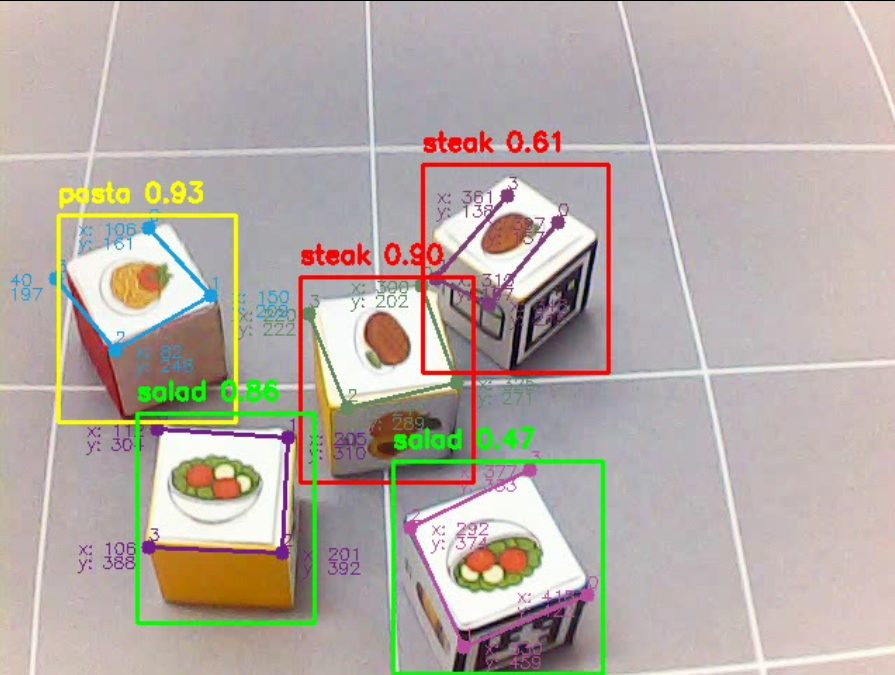

각각의 박스에는 음식 그림이 있어요.

- 노란색 박스 안에는 파스타 그림이 있어요.
- 빨간색 박스 안에는 스테이크 그림이 두 개 있어요.
- 보라색과 초록색 박스 안에는 샐러드 그림이 두 개 있어요. 

이렇게 보여요!

In [39]:
image_path = '/home/addinedu/LLM_ws/test_image/Screenshot from 2025-04-21 15-37-21.png'

# 이미지 파일로 부터 질의(스트림 방식)
answer = multimodal_llm.stream(image_path)

# 스트리밍 방식으로 각 토큰을 출력합니다. (실시간 출력)
stream_response(answer)


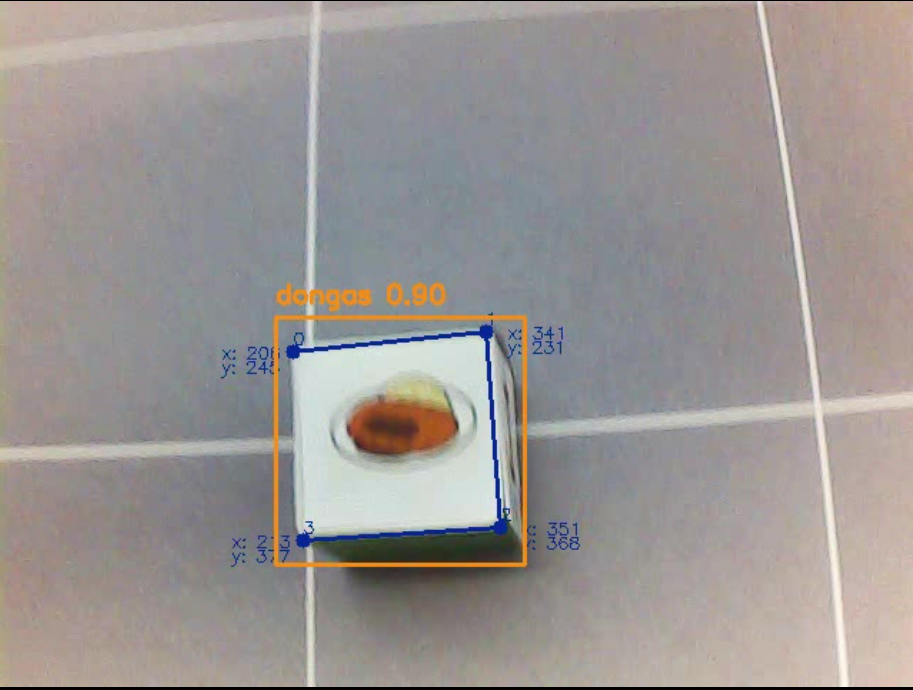

박스 안에 있는 사물은 'dongos'로 보이네요.

In [40]:
image_path = '/home/addinedu/LLM_ws/test_image/Screenshot from 2025-04-21 15-37-44.png'

# 이미지 파일로 부터 질의(스트림 방식)
answer = multimodal_llm.stream(image_path)

# 스트리밍 방식으로 각 토큰을 출력합니다. (실시간 출력)
stream_response(answer)